In [1]:
%pip install matplotlib
%pip install numpy
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlip (from versions: none)
ERROR: No matching distribution found for matplotlip


Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/38.7 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.7 MB 10.1 MB/s eta 0:00:04
   -- ------------------------------------- 2.4/38.7 MB 7.1 MB/s eta 0:00:06
   --- ------------------------------------ 3.1/38.7 MB 6.4 MB/s eta 0:00:06
   ------ --------------------------------- 6.0/38.7 MB 8.0 MB/s eta 0:00:05
   -------- ------------------------------- 8.1/38.7 MB 8.5 MB/s eta 0:00:04
   ---------- ----------------------------- 10.2/38.7 MB 8.9 MB/s eta 0:00:04
   ------------ --------------------------- 12.6/38.7 MB 9.2 MB/s eta 0:00:03
   --------------- ------------------------ 14.7/38.7 MB 9.4 MB/s eta 0:00:03
   ----------------- ---------------------- 17.0/38.7 MB 9.6 MB/s eta 0:00:03
   -------------------- ------------------- 19.4/38.7 MB 9.8 MB/s eta 0:00:02
   ---------------------- ----------------- 21.8/38.7 MB 10.0 MB/s eta 0:00:02
   ------

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import time
import os

global step

In [ ]:
# The following code is made for the Cholesky Decomposition implementation of the SDP formulation of the Quantum Mechanical Bootstrap on the Harmonic Potential

In [ ]:
def moment_list_generator(energy, no_of_terms: int) -> list:
    """
    Generate a list of moments for a given energy value.

    Parameters
    ----------
    energy
        The energy value used in the recurrence relation.
    no_of_terms : int
        Total number of terms (moments) to generate.

    Returns
    -------
    moment_list : list
        The list of computed moments.
    """

    # Initializion
    moment_list = [1, 0, energy, 0]

    # Recurrence relation 
    for i in range(4, no_of_terms):
        new_moment = (
            2 * energy * (i - 1) * moment_list[i - 2]
            + ((i - 1) * (i - 2) * (i - 3) * moment_list[i - 4]) / 4
        ) / i

        moment_list.append(new_moment)

    return moment_list

In [ ]:
def Hankel_matrix_generator(moment_list: list, K: int):
    """
    Construct a K * K Hankel matrix from a list of moments.

    Parameters
    ----------
    moment_list : list
        List of moments x_0, x_1, ..., used to fill the Hankel matrix.
        Assumes length >= 2K - 1.
    K : int
        Dimension of the (square) Hankel matrix.

    Returns
    -------
    matrix : list of lists
        A K * K Hankel matrix where M[i][j] = moment_list[i + j].
    """

    matrix = []

    for i in range(K):
        row = []
        for j in range(K):
            row.append(moment_list[i + j])
        matrix.append(row)

    return matrix

In [ ]:
def cholesky_flag(A):
    """
    Check whether a matrix is positive semidefinite using the Cholesky test.

    Parameters
    ----------
    A : array-like
        Matrix to be tested.

    Returns
    -------
    int
        1 if Cholesky decomposition succeeds (matrix is PSD),
        0 if decomposition fails.
    """

    # Convert input to NumPy array and symmetrize it
    M = np.array(A)
    M = 0.5 * (M + M.T)

    try:
        # Attempt Cholesky factorization
        scipy.linalg.cholesky(M)
        return 1
    except np.linalg.LinAlgError:
        # If decomposition fails, matrix is not PSD
        return 0

In [ ]:
# List of ranks K for which the bootstrap should run
K_list = [5, 8, 10, 13, 15, 18, 20]

# Energy values over which the search is performed
energy_list = list(np.arange(0, 3, 0.001))

# Dictionary: K ; list of (0/1) Cholesky flags across energies
flag_dict = {}

# Start performance timer
start = time.perf_counter()

for K in K_list:
    # Temporary container for results corresponding to the current K
    flag_list = [] 

    for energy in energy_list:
        try:
            # Generate moments and construct the Hankel matrix
            moment_list = moment_list_generator(energy, 2 * K + 1)
            matrix = Hankel_matrix_generator(moment_list, K)

            # 1 if PSD, 0 otherwise
            flag = cholesky_flag(matrix)
            flag_list.append(flag)

        except Exception:
            # Numerical/edge errors, treat as undefined
            flag_list.append(np.nan)

    # Store results for this rank K
    flag_dict[K] = flag_list

# End performance timer
end = time.perf_counter()


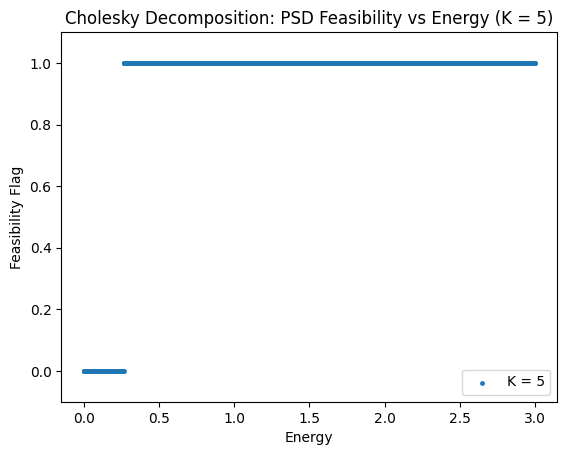

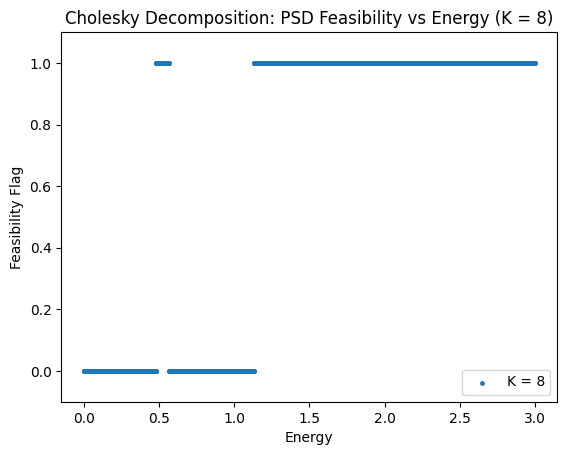

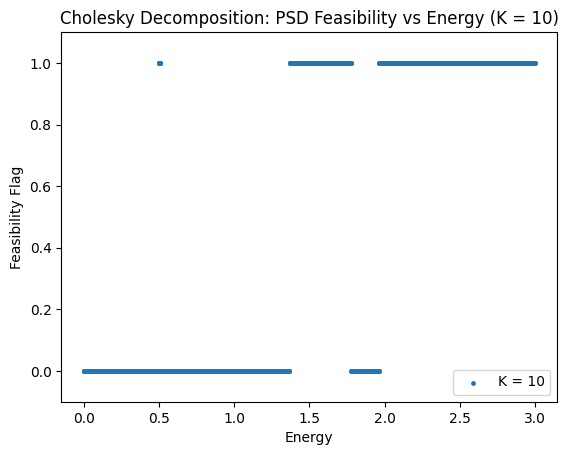

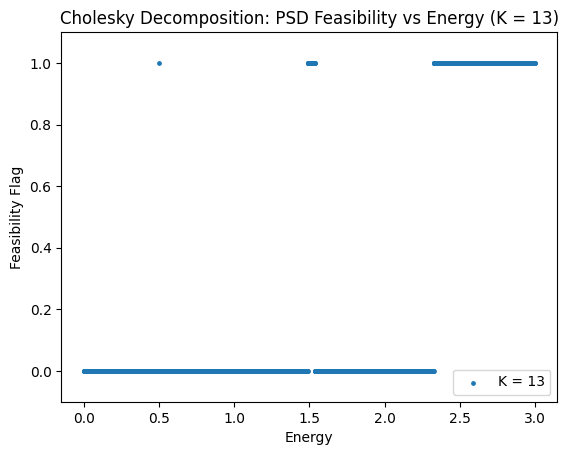

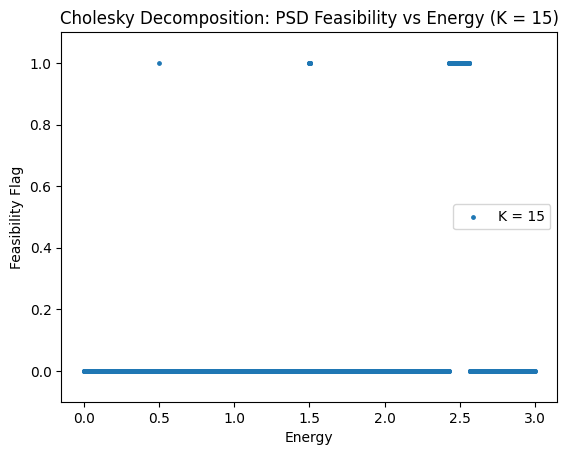

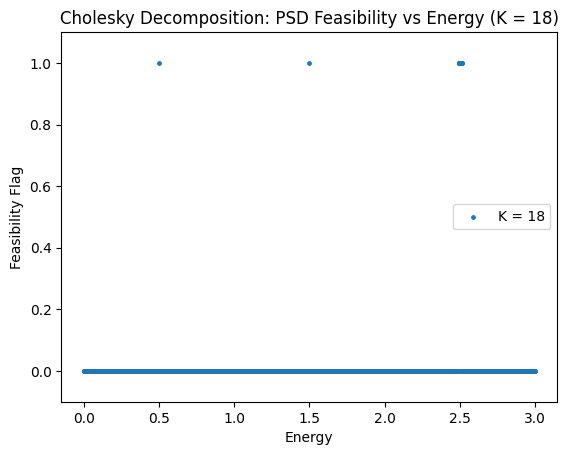

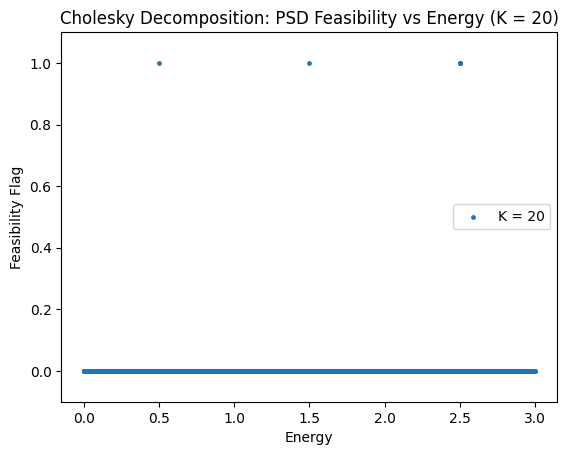

In [ ]:
def plot_flags_for_K(K: int, energy_list, flag_dict, save_dir=r"D:\BTP\Report\pictures"):
    """
    Plot PSD feasibility flags vs energy for a given K and save the figure.

    Parameters
    ----------
    K : int
        Hankel matrix size (rank) to plot.
    energy_list : list
        Energies corresponding to each flag.
    flag_dict : dict
        Maps K → list of 0/1/NaN feasibility flags.
    save_dir : str
        Directory where the PNG file will be stored.
    """

    # Convert inputs to arrays for plotting
    E = np.array(energy_list)
    flags = np.array(flag_dict[K])

    plt.figure()

    # Scatter plot of feasibility flags
    plt.scatter(E, flags, s=6, label=f"K = {K}")
    plt.ylim(-0.1, 1.1)  # Slight padding for visibility

    # Basic labels and title
    plt.xlabel("Energy")
    plt.ylabel("Feasibility Flag")
    plt.title(f"Cholesky Decomposition: PSD Feasibility vs Energy (K = {K})")
    plt.legend()

    # Build filename and save path
    filename = f"Cholesky_Decomposition_PSD_Feasibility_vs_Energy_K_{K}.png"
    filepath = os.path.join(save_dir, filename)

    # Save figure to disk
    plt.savefig(filepath, dpi=300, bbox_inches="tight")

    # Display the plot
    plt.show()

# Plot feasibility flags for each K in the list
for K in K_list:
    plot_flags_for_K(K, energy_list, flag_dict)

In [ ]:
# Print total runtime
print(end - start)

1.7998222999740392
